In [1]:
import os, sys, math, logging, random
from pathlib import Path

import numpy as np

%load_ext autoreload
%autoreload 2

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

logging.basicConfig(level=logging.INFO, stream=sys.stdout)

import yamlu

from pybpmn.dataset import HdBpmnDataset
from pybpmn import constants
from pybpmn.vis import Visualizer

In [6]:
project_root = Path().absolute().parent

# assumes that hdBPMN has been cloned in the same directory as pybpmn
# NOTE: change this if required
hdbpmn_root = project_root.parent / "hdBPMN"

# where to store the COCO formatted dataset
coco_dataset_root = project_root / "datasets" / "hdbpmn"

ds = HdBpmnDataset(hdbpmn_root, coco_dataset_root)

INFO:pybpmn.dataset:Parsed hdBPMN dataset with 702 images: {'train': 432, 'val': 144, 'test': 126}


# Parse BPMN XML into AnnotatedImage

AnnotatedImage(filename='ex00_writer0001.jpg', size=(2837, 2000), 30 annotations (Counter({'sequenceFlow': 13, 'task': 6, 'label': 5, 'event': 3, 'parallelGateway': 2, 'exclusiveGateway': 1})))


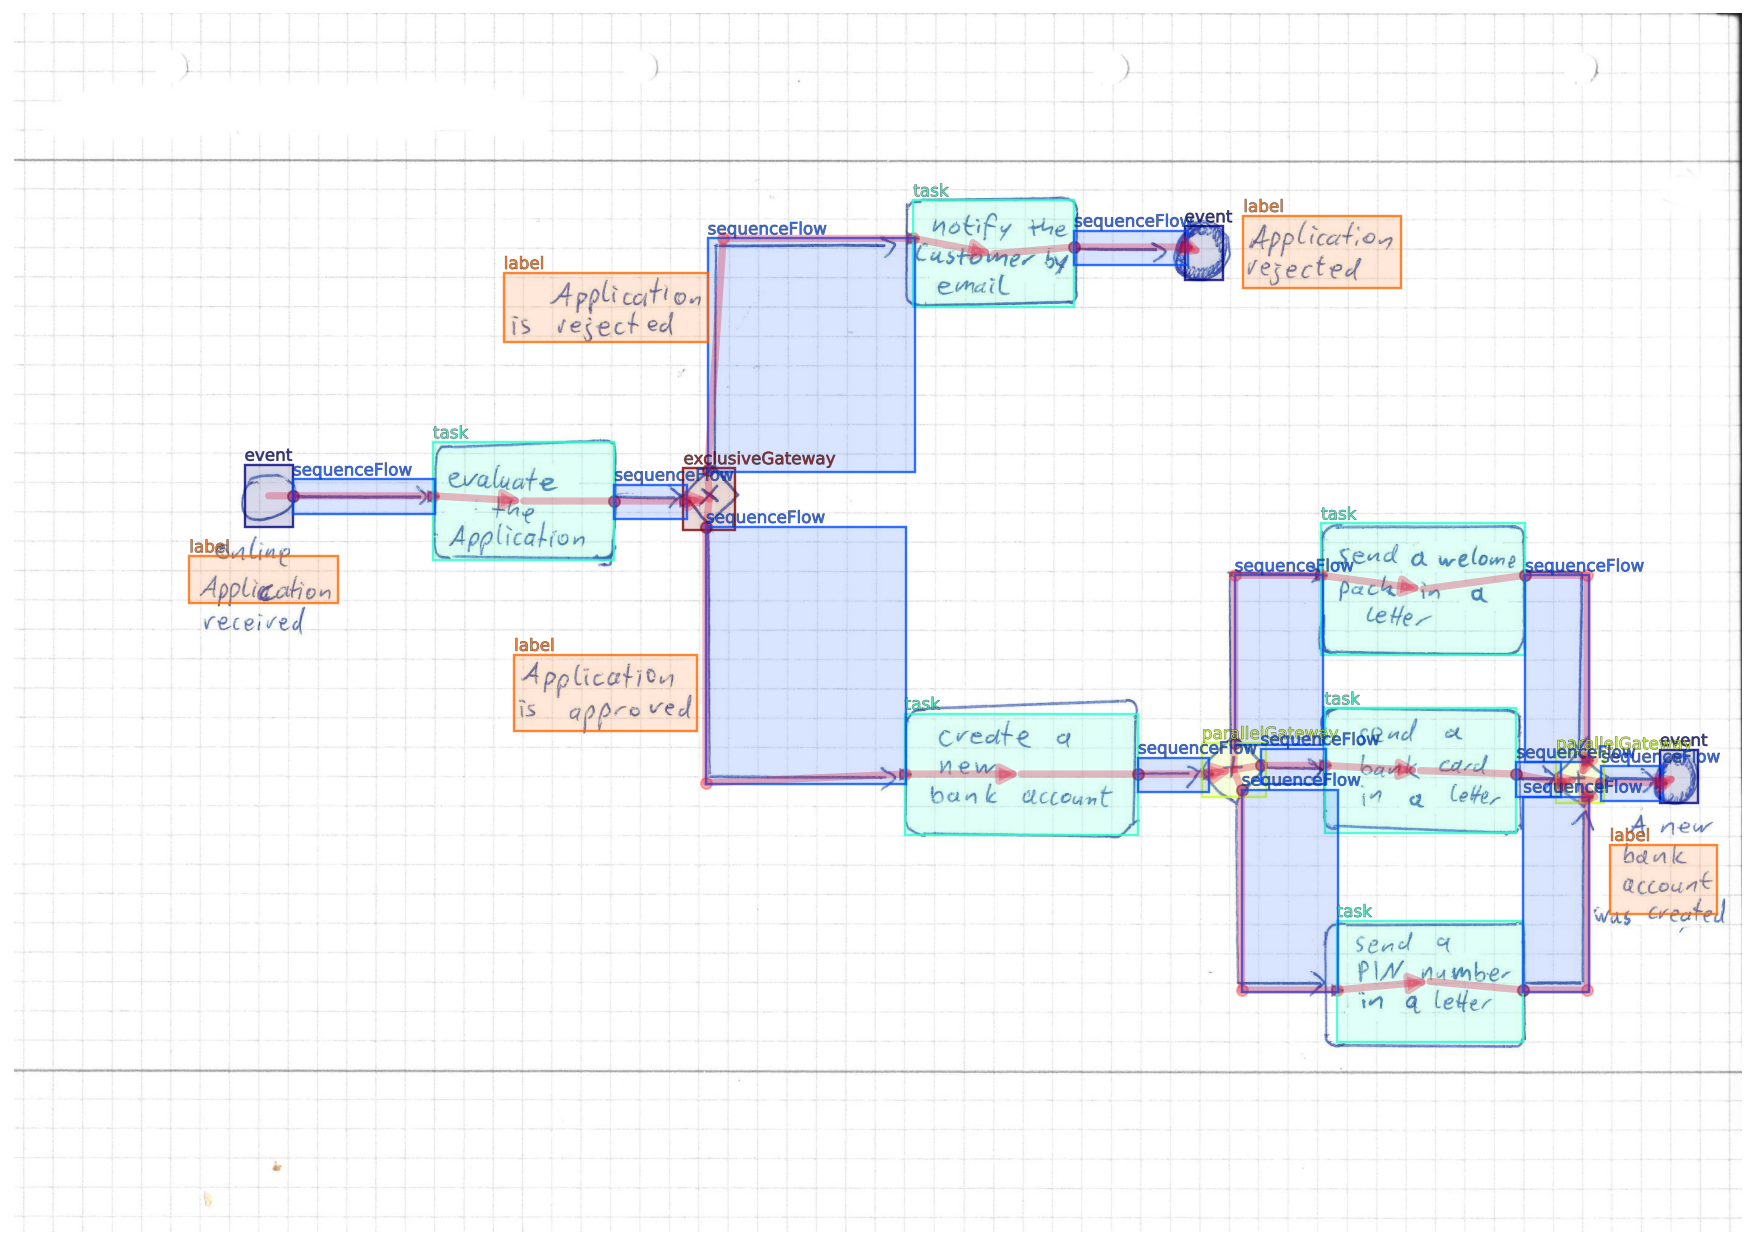

In [7]:
ai = ds.get_split_ann_img("train", 0)
print(ai)
ai.plot(figsize=(12,12))

# Visualize hand-drawn image with BPMN overlay

(1769, 1274)


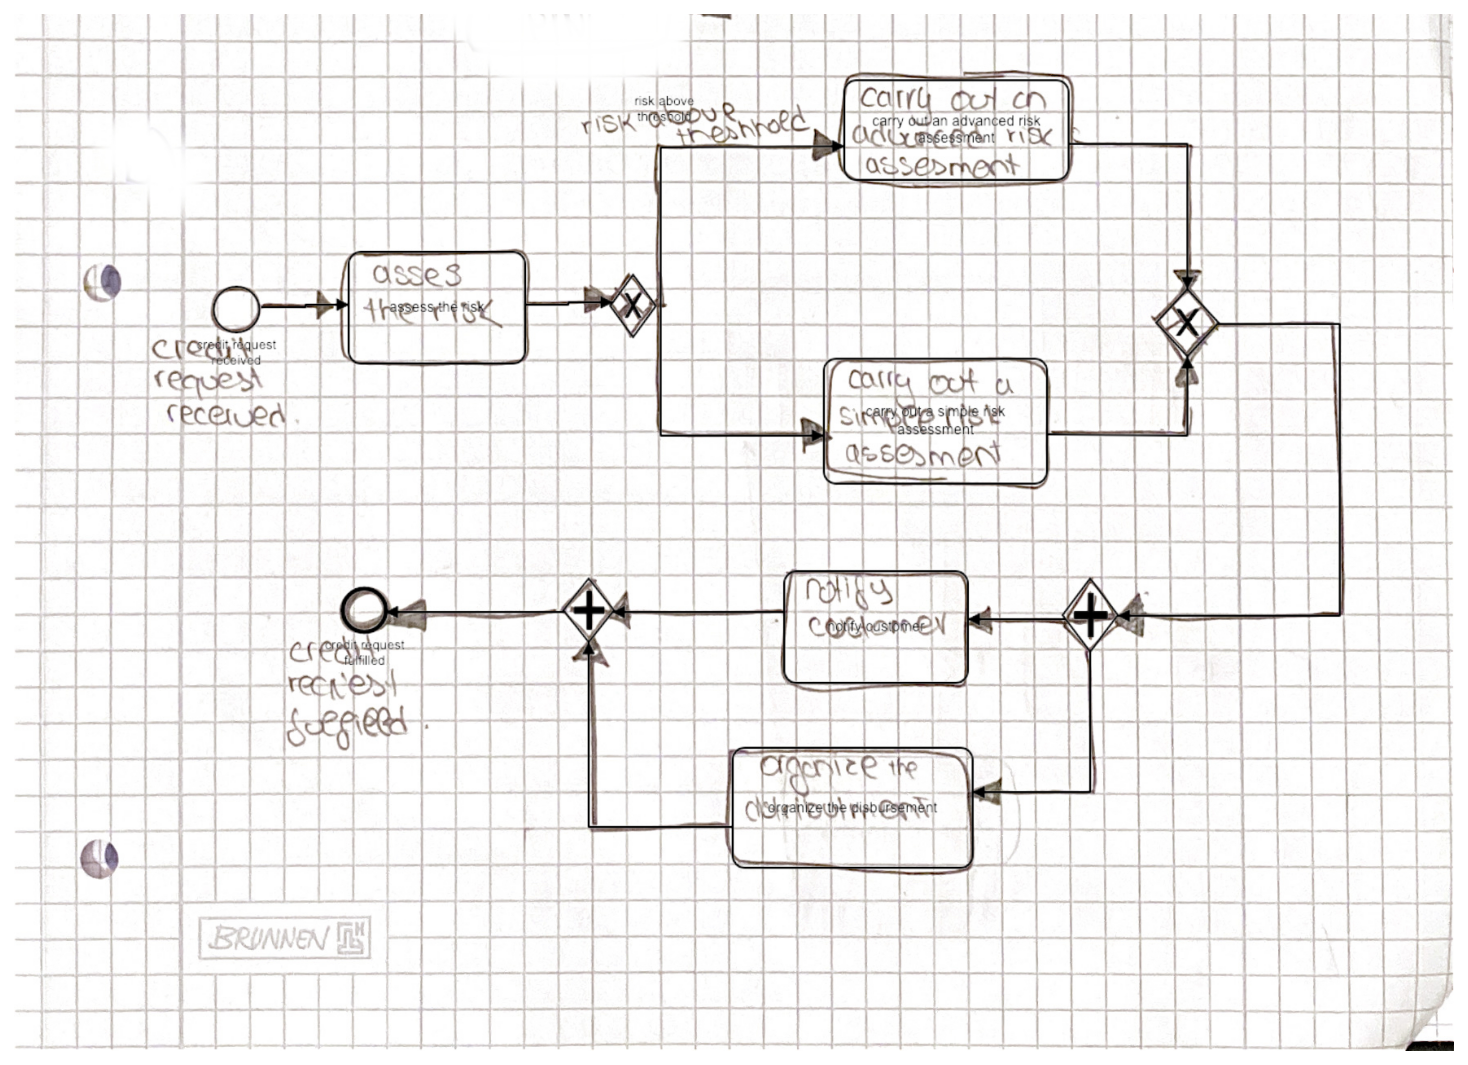

In [9]:
bpmn_path = random.choice(ds.split_to_bpmn_paths["train"])
img_path = ds.get_img_path(bpmn_path.stem)

visualizer = Visualizer.from_img_path(img_path, color="black")
img_overlay = visualizer.create_bpmn_overlay_img(bpmn_path)
print(img_overlay.size)
yamlu.plot_img(img_overlay, figsize=(10,10))